In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train_and_test2.csv
/kaggle/input/first-ssh/id_ed25519.pub
/kaggle/input/first-ssh/id_ed25519
/kaggle/input/first-ssh/Bash


In [2]:
!mkdir -p /root/.ssh
!cp /kaggle/input/first-ssh/id_ed25519 /root/.ssh/
!cp /kaggle/input/first-ssh/id_ed25519.pub /root/.ssh/
!chmod 600 /root/.ssh/id_ed25519
!ssh-keyscan github.com >> /root/.ssh/known_hosts
!ssh -T git@github.com


# github.com:22 SSH-2.0-9e814c2a
# github.com:22 SSH-2.0-9e814c2a
# github.com:22 SSH-2.0-9e814c2a
# github.com:22 SSH-2.0-9e814c2a
# github.com:22 SSH-2.0-9e814c2a
Hi TIMAR101/DS_journey! You've successfully authenticated, but GitHub does not provide shell access.


In [3]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

class DataLoader:
    def __init__(self, path):
        self.path = path
        self.df = None
        
    def load(self):
        try:
            self.df = pd.read_csv(self.path)
            print("✅ Данные загружены")
            print(f"Размер данных: {self.df.shape}")
            return True        

        
        except FileNotFoundError:
            print("❌ Файл не найден")
            return False
    def show_head(self, n = 5):

        if self.df is not None:
            display(self.df.head(n))
        else:
            print("Данные не загруженные! Сначала вызовите метод load!")
    
    def show_info(self):
        if self.df is not None:
            print("\n --- Общие данные об датасете:")
            print(self.df.info())
            print("\n--- Пропущенные значения:")
            print(self.df.isnull())            
            print(self.df.isnull().sum())

        else:
            print("Данные не загруженные! Сначала вызовите метод load!")
    def fix_columns_names(self):

        if self.df is not None:

            corrections = {
                '2urvived': 'Survived',
                'PasengerId': 'PassengerId',  # Пример другой возможной ошибки
                'Fare': 'TicketPrice'         # Пример переименования
            }
            valid_columns = {key:val for key, val in corrections.items() if key in self.df.columns}

            self.df.rename(columns = valid_columns, inplace = True)

            print(f"Переменованы следующие столбцы: {valid_columns}")

        else:
            print("Данные не загруженные! Сначала вызовите метод load!")

    def plot_survival(self):
        if self.df is not None:

            plt.figure(figsize=(8, 5))
            sns.countplot(x='Survived', data=self.df)  # Обратите внимание на опечатку в названии столбца!
            plt.title('Распределение выживших')
            plt.show()

        else:
            print("Данные не загруженные! Сначала вызовите метод load!")   
            


✅ Данные загружены
Размер данных: (1309, 28)
Truth


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0



 --- Общие данные об датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      130

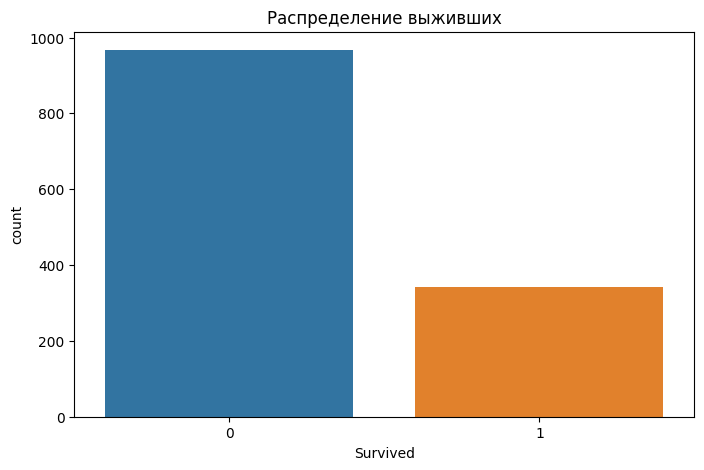

In [4]:
loader = DataLoader("/kaggle/input/titanic/train_and_test2.csv")
if loader.load():
    print("Truth")

    loader.show_head()
    loader.show_info()
    loader.fix_columns_names()
    loader.plot_survival()




In [5]:
!mkdir -p /kaggle/working/ssh_keys
!cp /root/.ssh/id_ed25519 /kaggle/working/ssh_keys/
!cp /root/.ssh/id_ed25519.pub /kaggle/working/ssh_keys/
